## Loan Approval Prediction

### 1) Problem statement ###
*Design a machine learning model to predict loan approval status (Loan_Status) using demographic, financial, and property-related features to help banks streamline the loan approval process and reduce manual intervention.

### 2) Data Collection ###
* Dataset Source: 'data/loan_approval_dataset.csv'
* The data consists of 12 column and 1000 rows.

### 2.1 Import Data and Required Packages ###
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [48]:
df = pd.read_csv('../data/LoanData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df.shape

(614, 13)

### 2.2 Dataset information ###
* ApplicantIncome: 	Income of the primary applicant.
* CoapplicantIncome: Income of the co-applicant (if any).
* LoanAmount: Loan amount requested (in thousands).
* Loan_Amount_Term: Term of the loan in months.
* Credit_History: Whether the applicant has a good credit history (1 = Yes, 0 = No).
* Gender: Gender of the applicant.
* Married: Whether the applicant is married.
* Dependents: Number of dependents the applicant has.
* Education: Education level of the applicant.
* Self_Employed: Whether the applicant is self-employed.
* Property_Area: The type of area where the property is located.
* Loan_Status: Final loan decision (whether the loan is approved or not).

### 3. Data Checks to perform ###
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check data types ###

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3.2 Check Missing values ###

In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 3.3 Check statistics of data set ###

In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [53]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### To identify Unique values is columns ###

In [54]:
col = df.select_dtypes('object').columns
for i in col:
    print('Unique values is columns "{}": {}'.format(i,df[i].nunique()))
    print('---------------------------------------------------------')
    print('Value counts: "{}" \n{}'.format(i,df[i].value_counts()))
    print('---------------------------------------------------------')

Unique values is columns "Loan_ID": 614
---------------------------------------------------------
Value counts: "Loan_ID" 
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
---------------------------------------------------------
Unique values is columns "Gender": 2
---------------------------------------------------------
Value counts: "Gender" 
Gender
Male      489
Female    112
Name: count, dtype: int64
---------------------------------------------------------
Unique values is columns "Married": 2
---------------------------------------------------------
Value counts: "Married" 
Married
Yes    398
No     213
Name: count, dtype: int64
---------------------------------------------------------
Unique values is columns "Dependents": 4
---------------------------------------------------------
Value counts: "Dependents" 
Dependents
0     3

In [55]:
print("Categories in 'Education' variable: ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable: ",end=" ")
print(df['Self_Employed'].unique())

print("Categories in 'Property_Area' variable: ",end=" ")
print(df['Property_Area'].unique())

print("Categories in 'Loan_Status' variable: ",end=" ")
print(df['Loan_Status'].unique())

Categories in 'Education' variable:  ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:  ['No' 'Yes' nan]
Categories in 'Property_Area' variable:  ['Urban' 'Rural' 'Semiurban']
Categories in 'Loan_Status' variable:  ['Y' 'N']


In [56]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features: {}'.format(len(cat_feature), cat_feature))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
We have 8 categorical features: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [57]:
df.columns = df.columns.str.strip()

In [58]:
numerical_feture = df.select_dtypes(exclude='object').columns
categorical_feature = df.select_dtypes(include='object').columns

In [59]:
correlation_matrix = df[numerical_feture].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: >

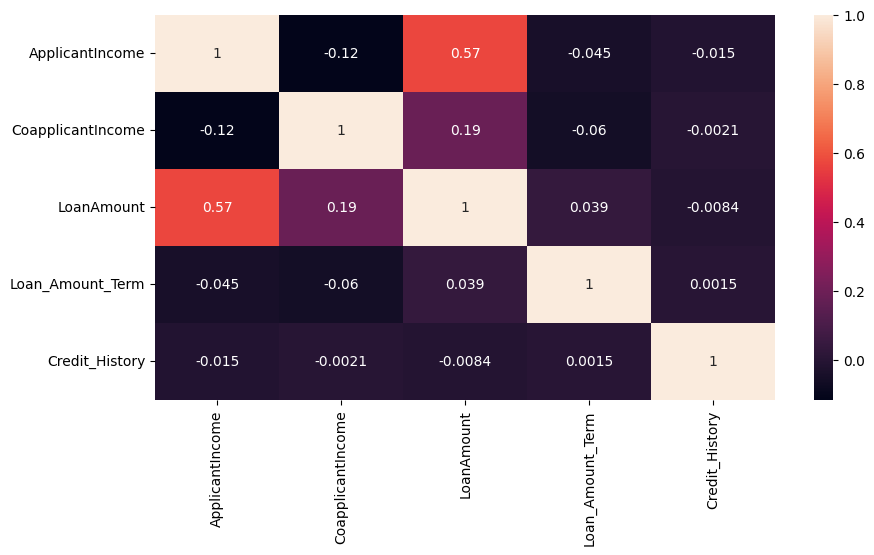

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True)

### Highest Correlation ###
* In the given correlation matrix, the highest off-diagonal correlation is between CoapplicantIncome and LoanAmount with a value of 0.101.

### Lowest Correlation: ###
* The lowest correlation (besides diagonal self-correlations) is between LoanAmount and ApplicantIncome at -0.013.

### Skewness ###

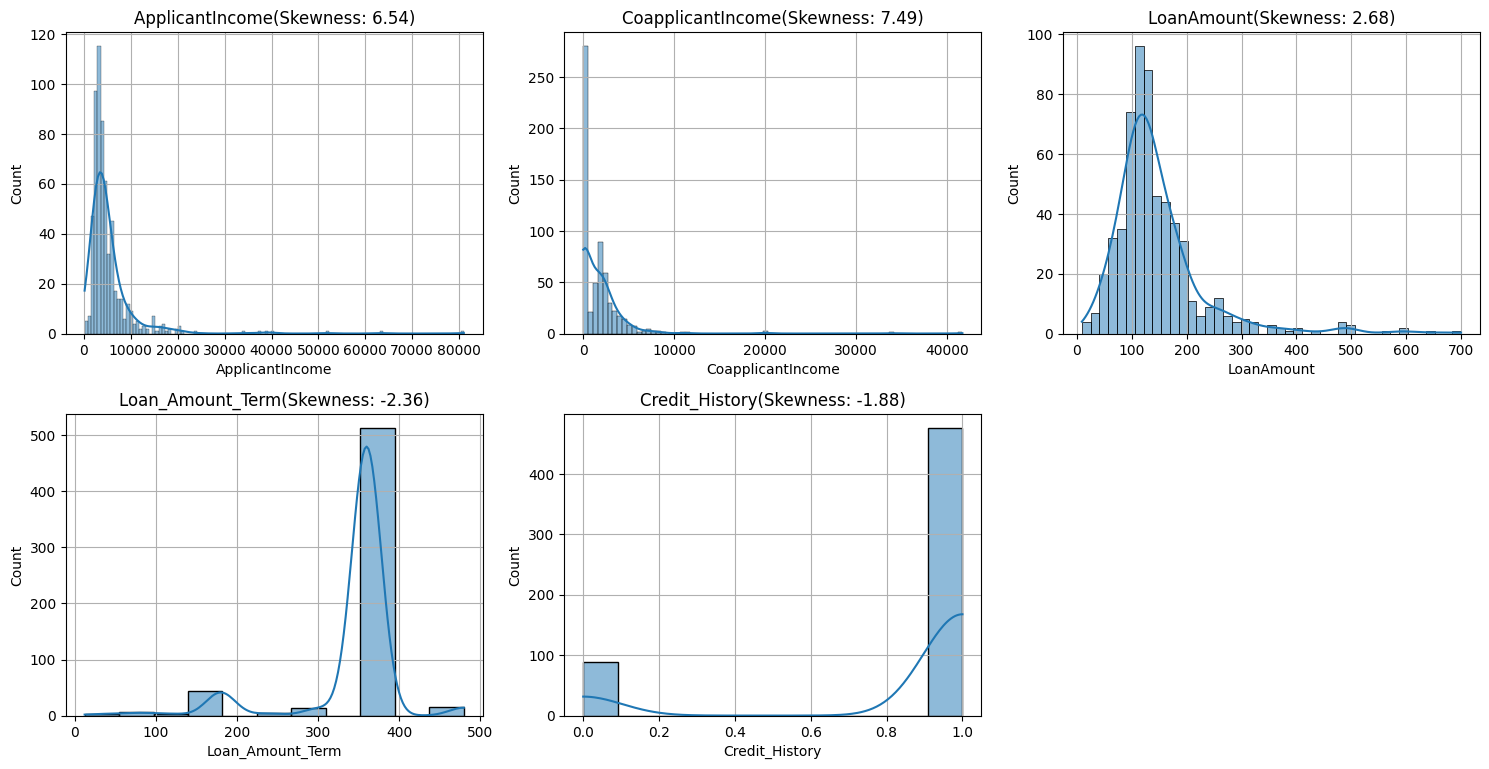

In [61]:
def plot_histogram(df, cols):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        skewness = df[column].skew()
        plt.grid(True)
        plt.title(f'{column}(Skewness: {skewness:.2f})')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histogram(df, numerical_feture)

### Checking Skewness value ###

In [62]:
from scipy.stats import skew
skewness_threshold = 1.0

# Calculate skewness for each numeric column
skewness_values = df.apply(lambda x: skew(x) if pd.api.types.is_numeric_dtype(x) else None)

# Identify columns with high skewness
high_skew_columns = skewness_values[abs(skewness_values) >= skewness_threshold]

# Display the results
print("Skewness Values:")
print(skewness_values)

print("\nColumns with High Skewness:")

Skewness Values:
Loan_ID                   NaN
Gender                    NaN
Married                   NaN
Dependents                NaN
Education                 NaN
Self_Employed             NaN
ApplicantIncome      6.523526
CoapplicantIncome    7.473217
LoanAmount                NaN
Loan_Amount_Term          NaN
Credit_History            NaN
Property_Area             NaN
Loan_Status               NaN
dtype: float64

Columns with High Skewness:


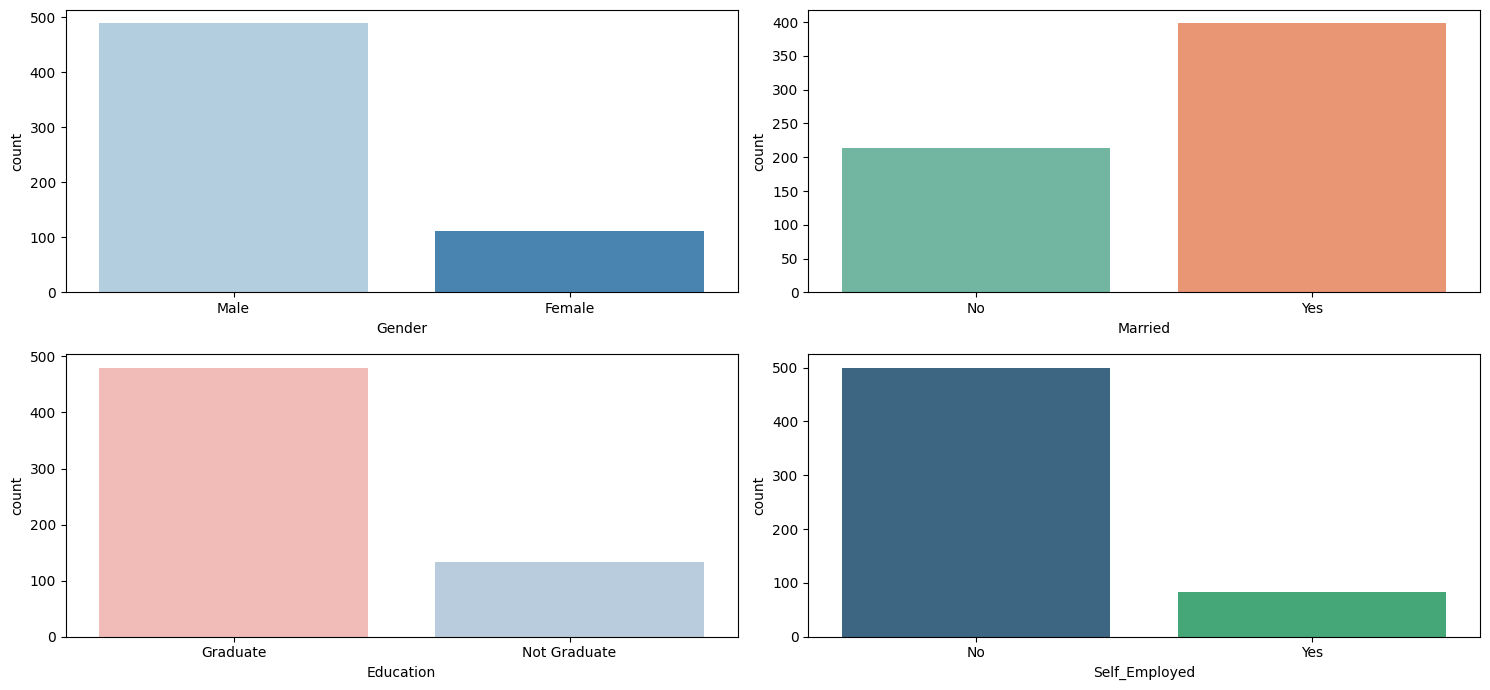

In [63]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

# First subplot
sns.countplot(x='Gender', data=df, ax=axes[0, 0], palette='Blues')

# Second subplot
sns.countplot(x='Married', data=df, ax=axes[0, 1], palette='Set2')

# Third subplot
sns.countplot(x='Education', data=df, ax=axes[1, 0], palette='Pastel1')

# Fourth subplot
sns.countplot(x='Self_Employed', data=df, ax=axes[1, 1], palette='viridis')

# Display the plots
plt.tight_layout()
plt.show()

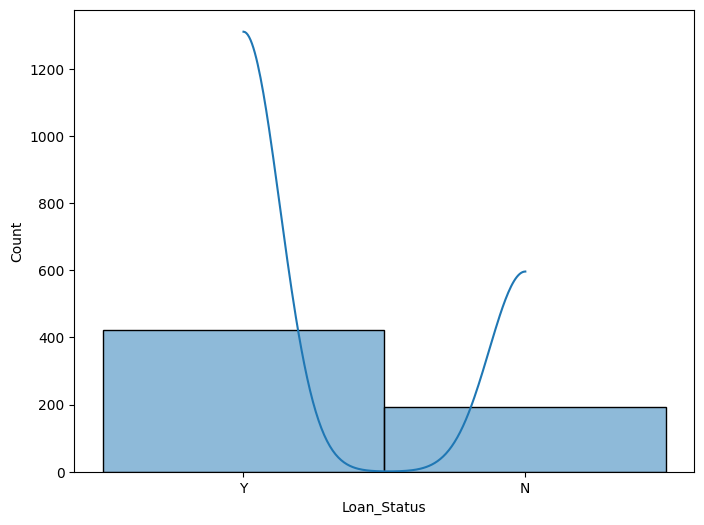

In [64]:
plt.figure(figsize=(8,6))
sns.histplot(df['Loan_Status'],kde=True)
plt.show()

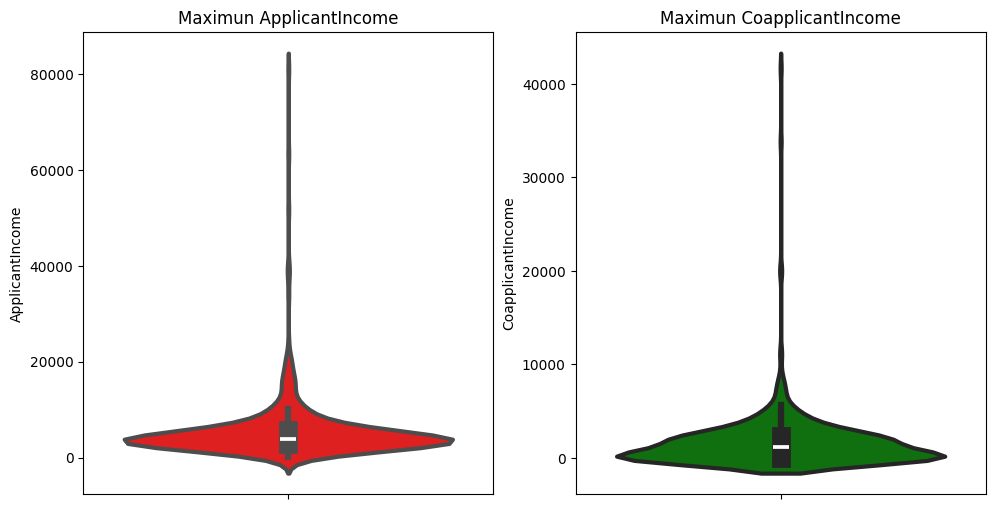

In [66]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Maximun ApplicantIncome')
sns.violinplot(y='ApplicantIncome',data=df,linewidth=3,color='red')
plt.subplot(1,3,2)
plt.title('Maximun CoapplicantIncome')
sns.violinplot(y='CoapplicantIncome',data=df,linewidth=3,color='green')
plt.show()

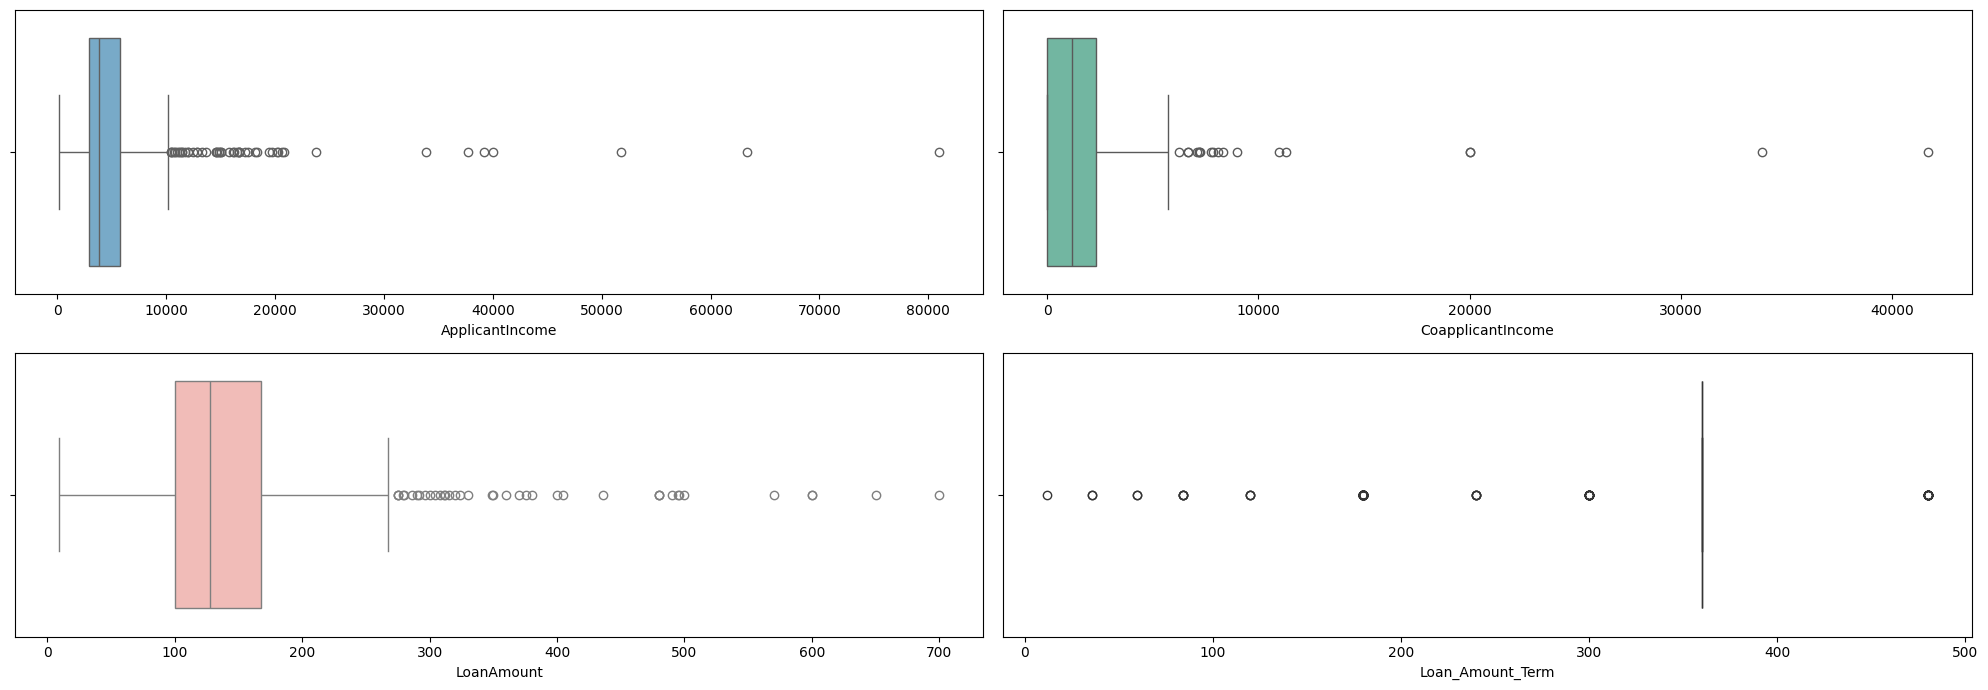

In [67]:
# Create figure
plt.figure(figsize=(20, 7))

# First subplot: ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ApplicantIncome'], palette='Blues')

# Second subplot: CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'], palette='Set2')

# Third subplot: LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(x=df['LoanAmount'], palette='Pastel1')

# Fourth subplot: Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Loan_Amount_Term'], palette='viridis')

# Show the plots
plt.tight_layout()
plt.show()